In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

<b>Комментарий:</b> Загрузка данных

In [19]:
df = pd.read_csv('./Data/training.csv')
df = df.drop('EventId',axis=1)

In [20]:
df['Label'] = df['Label'].map({'s' : 0, 'b' : 1})
dfTest = df.copy()
df.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0       138.470                       51.655        97.827    27.980   
1       160.937                       68.768       103.235    48.146   
2      -999.000                      162.172       125.953    35.635   
3       143.905                       81.417        80.943     0.414   
4       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_jet_num  \
0               3.064      41.928     197.760  ...            2   
1               3.473       2.078     125.157  ...            1   
2               3.148       9.336     197.814  ...            1   
3               3.310       0.414      75.968  ...            0   
4               3.891      16.405      57.983  ...            0   

   PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  \
0              67.435                2.150                0.444   
1              46.226                0.725                1.158   
2              44.251                2.053               -2.028   
3            -999.000             -999.000             -999.000   
4            -999.000             -999.000             -999.000   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  \
0                 46.062                    1.24                  -2.475   
1               -999.000                 -999.00                -999.000   
2               -999.000                 -999.00                -999.000   
3               -999.000                 -999.00                -999.000   
4               -999.000                 -999.00                -999.000   

   PRI_jet_all_pt    Weight  Label  
0         113.497  0.002653      0  
1          46.226  2.233584      1  
2          44.251  2.347389      1  
3          -0.000  5.446378      1  
4           0.000  6.245333      1  

[5 rows x 32 columns]

<b>Комментарий:</b> Я откинул "EventId" так как оно,похоже, просто нумерует строки. Значени в столбце "Label" принимали всего два варианта: s и b, поэтому я заменил их на 0 и 1. Полагаю, это не скажется на дальнейшей работе алгоритма.

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


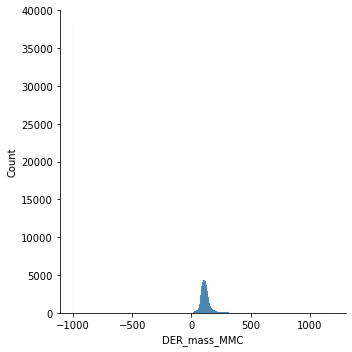

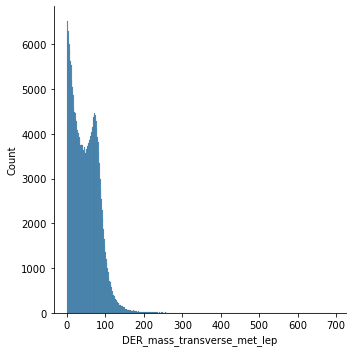

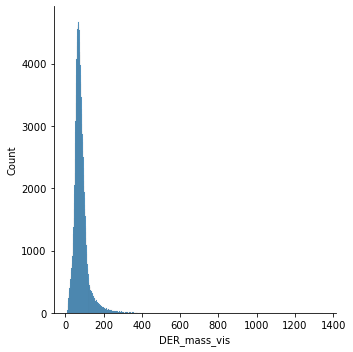

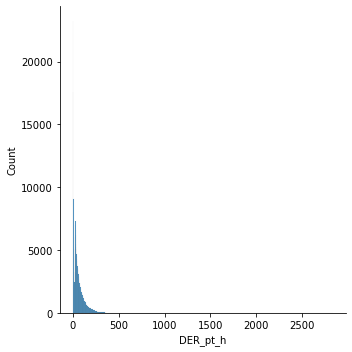

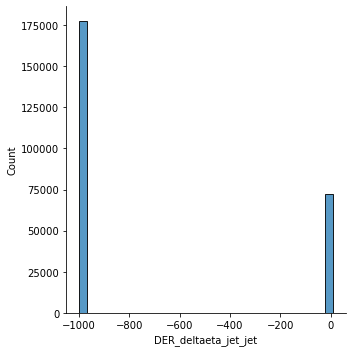

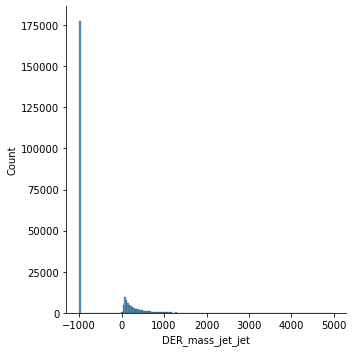

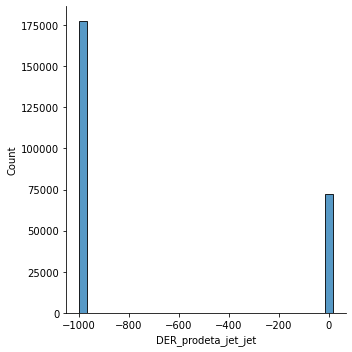

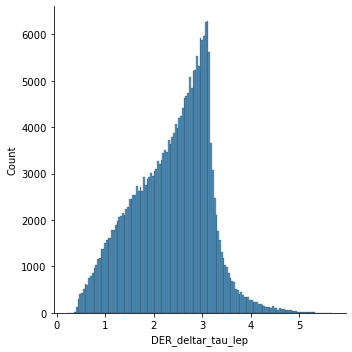

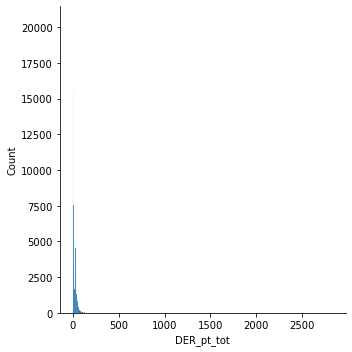

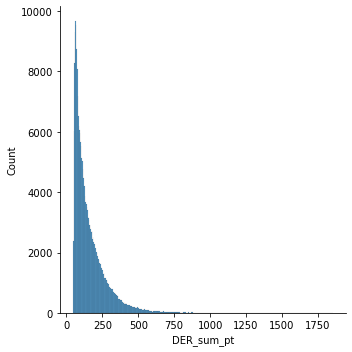

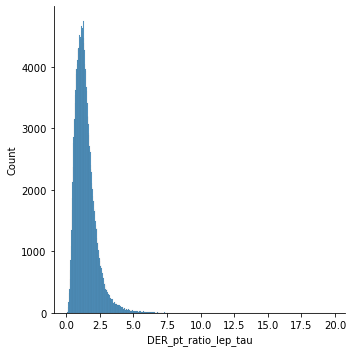

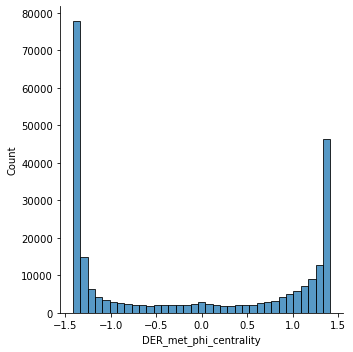

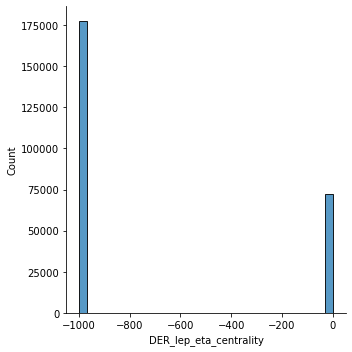

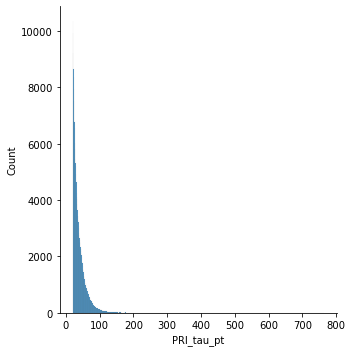

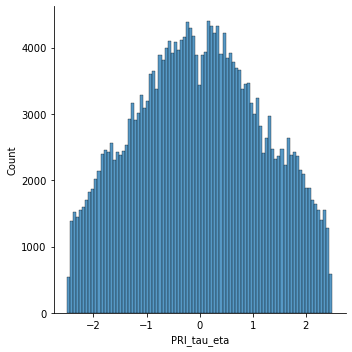

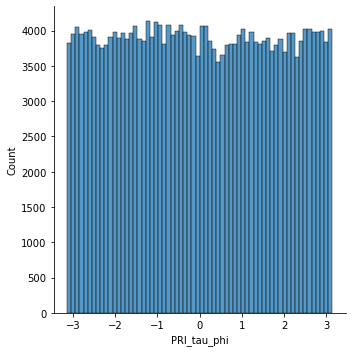

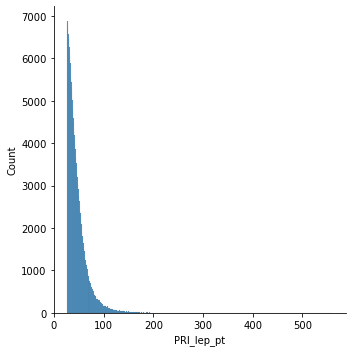

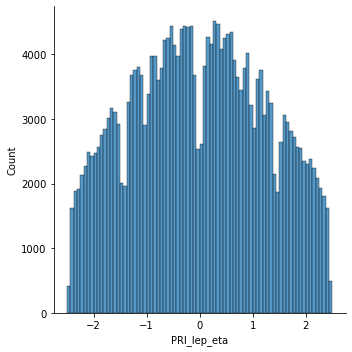

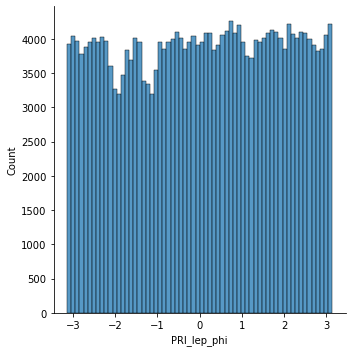

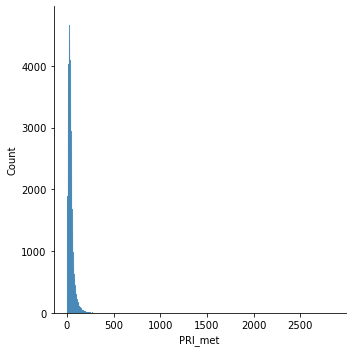

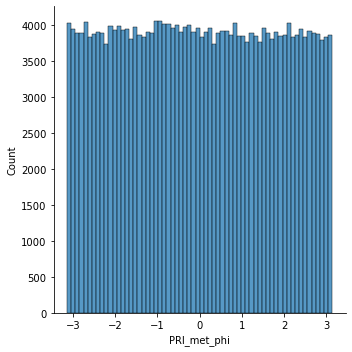

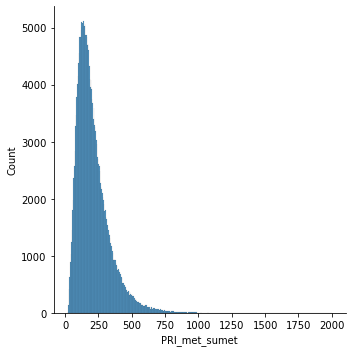

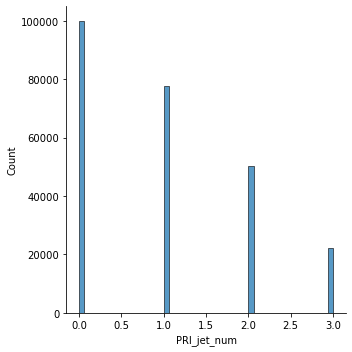

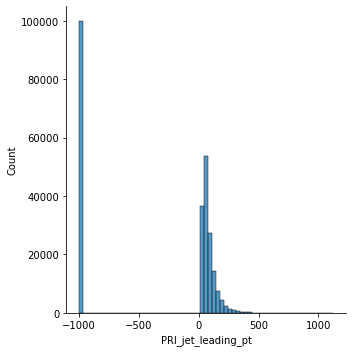

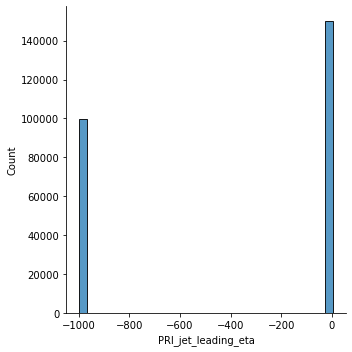

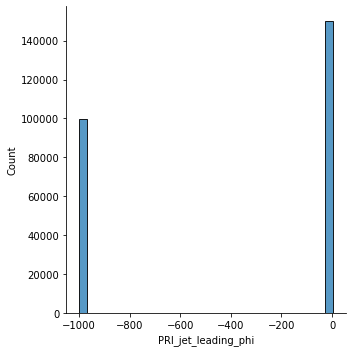

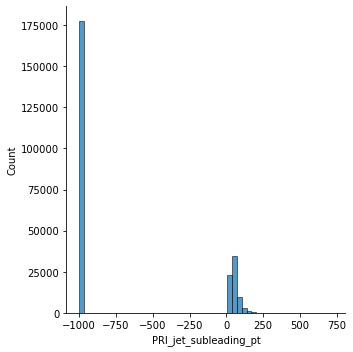

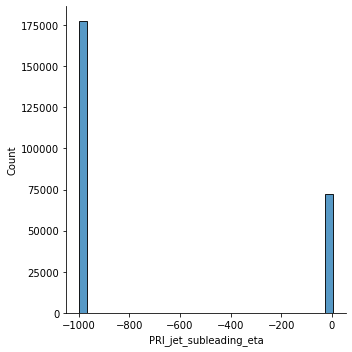

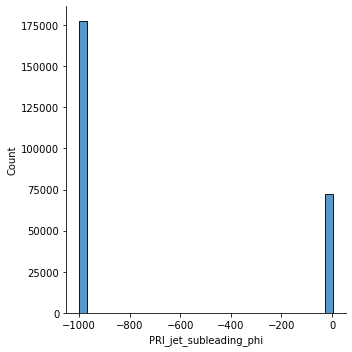

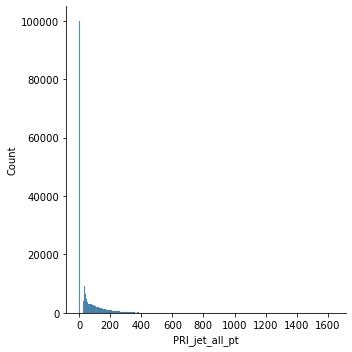

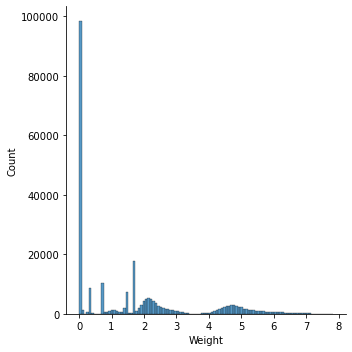

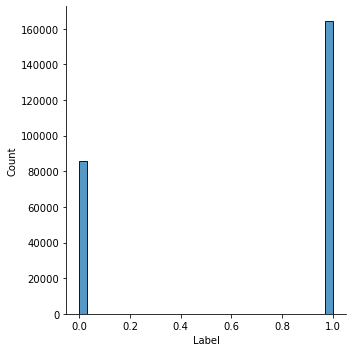

In [4]:
for i in df.columns:
    sns.displot(df[i])

<b>Комментарий:</b> У ряда графиков потенциально есть выбросы, я хочу проверить это и откинуть лишнее 

1192.026
-999.0


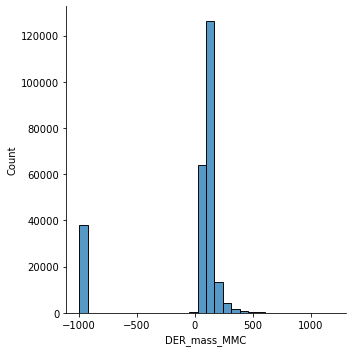

In [21]:
sns.displot(df['DER_mass_MMC'],bins = 30)
print(df['DER_mass_MMC'].max())
print(df['DER_mass_MMC'].min())

529.597
9.044


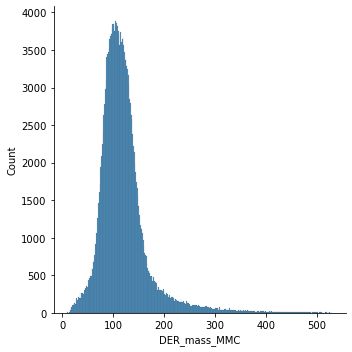

In [22]:
dfTest['DER_mass_MMC'] = dfTest[(dfTest['DER_mass_MMC'] > 0) & (dfTest['DER_mass_MMC'] < 530)]
sns.displot(dfTest['DER_mass_MMC'])
print(dfTest['DER_mass_MMC'].max())
print(dfTest['DER_mass_MMC'].min())

690.075
0.0


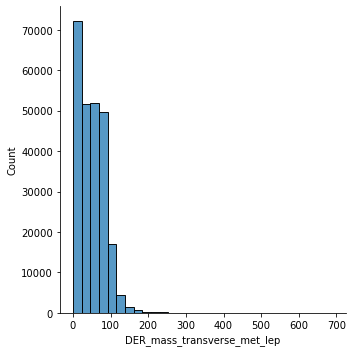

In [23]:
sns.displot(df['DER_mass_transverse_met_lep'],bins = 30)
print(df['DER_mass_transverse_met_lep'].max())
print(df['DER_mass_transverse_met_lep'].min())

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0       138.470                      138.470        97.827    27.980   
1       160.937                      160.937       103.235    48.146   
2           NaN                          NaN       125.953    35.635   
3       143.905                      143.905        80.943     0.414   
4       175.864                      175.864       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_jet_num  \
0               3.064      41.928     197.760  ...            2   
1               3.473       2.078     125.157  ...            1   
2               3.148       9.336     197.814  ...            1   
3               3.310       0.414      75.968  ...            0   
4               3.891      16.405      57.983  ...            0   

   PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  \
0              67.435                2.150                0.444   
1              46.226                0.725                1.158   
2              44.251                2.053               -2.028   
3            -999.000             -999.000             -999.000   
4            -999.000             -999.000             -999.000   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  \
0                 46.062                    1.24                  -2.475   
1               -999.000                 -999.00                -999.000   
2               -999.000                 -999.00                -999.000   
3               -999.000                 -999.00                -999.000   
4               -999.000                 -999.00                -999.000   

   PRI_jet_all_pt    Weight  Label  
0         113.497  0.002653      0  
1          46.226  2.233584      1  
2          44.251  2.347389      1  
3          -0.000  5.446378      1  
4           0.000  6.245333      1  

[5 rows x 32 columns]

690.075
0.0


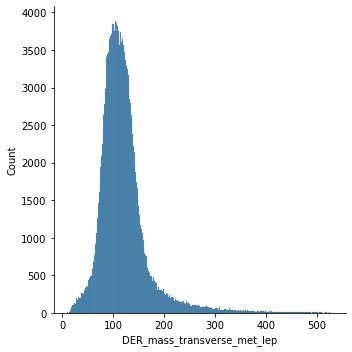

In [25]:
dfTest['DER_mass_transverse_met_lep'] = dfTest[(dfTest['DER_mass_transverse_met_lep'] < 300)]
sns.displot(dfTest['DER_mass_transverse_met_lep'])
print(df['DER_mass_transverse_met_lep'].max())
print(df['DER_mass_transverse_met_lep'].min())